In [1]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, f1_score
from scipy.special import softmax
file_dir = '/home/wmg-5gcat/Desktop/Sajjad/DistEstIntrospection/Introspect3D/outputs/results/simple_trouble_her.pkl'
with open(file_dir, 'rb') as f:
    results = pickle.load(f)
all_labels = results['labels']
all_preds = results['predictions']
all_preds = softmax(all_preds, axis=1)

In [2]:
print('class 0 count:', np.sum(all_labels == 0))
print('class 1 count:', np.sum(all_labels == 1))
print('class 2 count:', np.sum(all_labels == 2))

class 0 count: 4399
class 1 count: 1065
class 2 count: 0


In [9]:
# 3 classe
classes = ['less_than_0.1', 'between_0.1and_2', 'greater_than_2']
all_scores_01 = np.zeros((all_preds.shape[0]))
all_scores_01 = np.sum(all_preds[:, 1:3], axis=1)
all_labels_01 = all_labels!=0
classes_01 = ['less_than_0.1', 'more_than_0.1']

# all_scores_2 = all_preds[:, 2]
# all_labels_2 = all_labels==2
# classes_2 = ['less_than_2', 'more_than_2']

Precision: 0.601
Recall (+): 0.609
Recal (-): 0.902
ROC AUC: 0.863
F1: 0.605
Confusion Matrix:
[[3969  430]
 [ 416  649]]


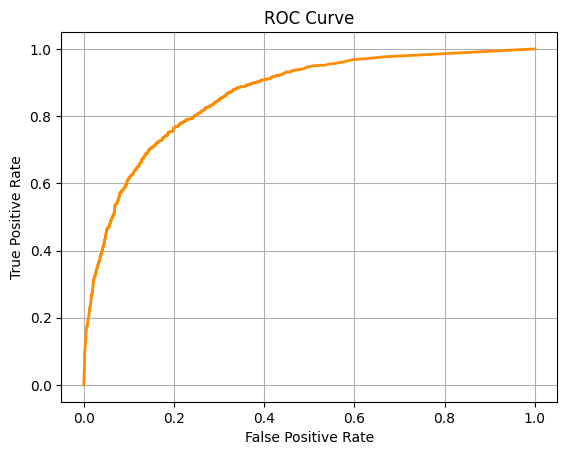

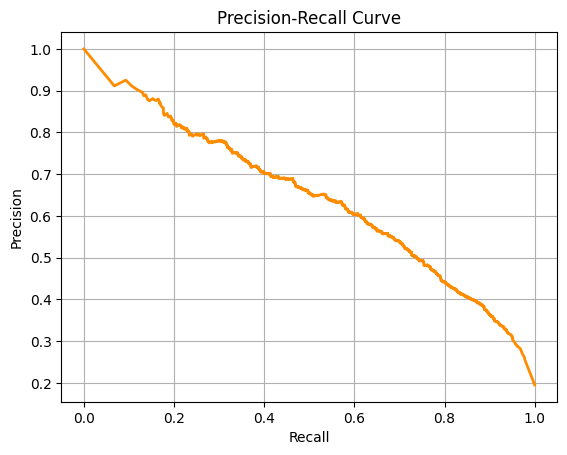

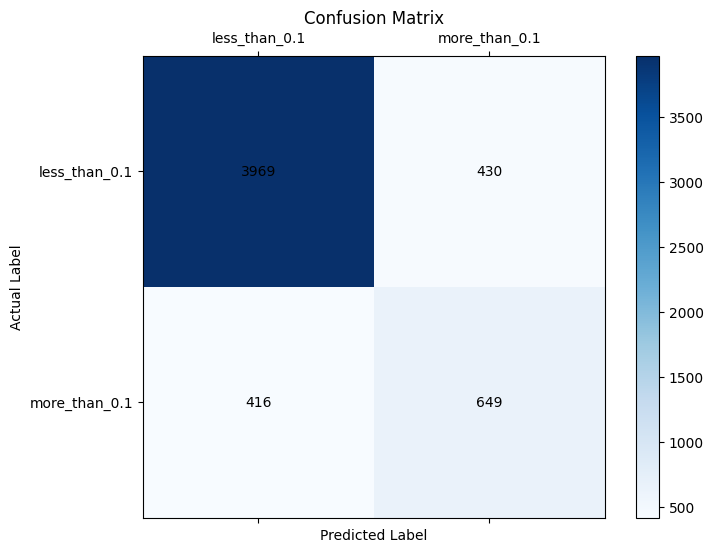

In [12]:
calc_metrics(all_labels_01, all_scores_01, classes_01)

In [11]:
def calc_metrics(all_labels, all_scores, classes):
    all_preds = all_scores > 0.5
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    recall_neg = recall_score(1-all_labels, 1-all_preds)
    f1 = f1_score(all_labels, all_preds)
    fpr, tpr, _ = roc_curve(all_labels, all_scores)
    roc_auc = roc_auc_score(all_labels, all_scores)
    cm = confusion_matrix(all_labels, all_preds)
    
    # plot roc curve curve
    print('Precision: %.3f' % precision)
    print('Recall (+): %.3f' % recall)
    print('Recal (-): %.3f' % recall_neg)
    print('ROC AUC: %.3f' % roc_auc)
    print('F1: %.3f' % f1)
    print('Confusion Matrix:')
    print(cm)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.grid()
    plt.show()
    # plot precision-recall curve
    precision, recall, _ = precision_recall_curve(all_labels, all_scores)
    plt.figure()
    plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid()
    plt.show()
    
    plot_confusion_matrix(all_labels, all_preds, classes)

In [5]:
def plot_confusion_matrix(y_true, y_pred, class_names=None, title='Confusion Matrix'):
    """
    Plots a confusion matrix using matplotlib.

    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.
    class_names (list, optional): List of class names. Defaults to None.
    title (str, optional): Title of the plot. Defaults to 'Confusion Matrix'.
    """
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8, 6))
    cax = ax.matshow(cm, cmap='Blues')
    plt.colorbar(cax)

    if class_names is None:
        class_names = [str(i) for i in range(cm.shape[0])]

    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title(title)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center', color='black')

    plt.show()